# Townsend Part 2: Plotting the observed vs. predicted

Code Contributor: Prabu Ravindran


In [11]:
%matplotlib inline
from typing import List, Dict
from pathlib import Path
import json
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from demo_utils import *

In [12]:
trait_cols = ['Nitrogen_CWM', 'Carbon_CWM', 'LMA_CWM', 'Water_CWM']
data_csv = 'compatible_SpectraCWM.csv'

W.shape = (5, 353), b.shape = (1, 5)
X_full.shape = (102, 353)
predictions.shape = (102, 5), mean_predictions.shape = (102,), sdev_predictions.shape = (102,)


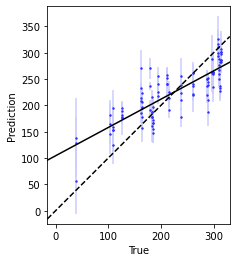

In [13]:
# load the model
# Change index of trait_cols[] to evaluate different trait
trait_col = trait_cols[2]
with open(f'{trait_col}_model_file.json', 'r') as reader:
    d = json.load(reader)
W = np.array(d['coefficients'])
b = np.array(d['intercepts']).T
print(f'{W.shape = }, {b.shape = }')

# Change index of trait_cols[] to evaluate different trait
# get the data
(X_full, y_full, wavelengths) = read_data(data_csv=data_csv, trait_col=trait_cols[2])
# preprocessing
# remove bad bands
(X_full, waves) = bad_bands_removal(X_full, wavelengths)
# unit vector normalization
X_full = unit_vector_normalization(X_full)
print(f'{X_full.shape = }')

# make predictions with all models
# get the mean predictions as the sample predictions
# the standard deviation of the predictions is the uncertainty
predictions = X_full@W.T + b
mean_predictions, sdev_predictions = np.mean(predictions, axis=1), np.std(predictions, axis=1)
print(f'{predictions.shape = }, {mean_predictions.shape = }, {sdev_predictions.shape = }')

fig, ax = plt.subplots()

ax.axline((1, 1), slope=1, color='black', linestyle='--')
m, b = np.polyfit(y_full, mean_predictions, deg=1)
ax.axline((0, b), slope=m, color='black', linestyle='-')
ax.errorbar(y_full, mean_predictions, yerr=sdev_predictions, fmt='none', zorder=0, ecolor='#ccccff')
ax.scatter(y_full, mean_predictions, color='#3232ff', zorder=1, s=2)
ax.set_xlabel('True')
ax.set_ylabel('Prediction')

plt.axis('scaled')
plt.show()
plt.close()